<a href="https://colab.research.google.com/github/hUwUtao/HiEQ2023/blob/main/The_HiSchool_Entry_Qualification_Test_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The high school entry qualification test 2023

### please check this out:

- [the dataset](https://github.com/huwutao/hieq2023)
- [the scraper](https://github.com/azurenekowo/tsdaucap-scraper)

### credits

> ### Datasets scraped by [@azurenekowo](https://github.com/azurenekowo). The original data is collected from [tsdaucap Ha Noi](tsdaucap.hanoi.gov.vn), [hanoimoi newspaper's database](https://hanoimoi.vn/diem-thi-lop-10-2023)

In [46]:
#@title Fetch the dataset from [github](https://github.com/huwutao/hieq2023)
dataset_url = "https://huwutao.github.io/HiEQ2023" #@param {type:"string"}
dataset_name = "HaNoi105k/TSDC_105k.csv" #@param ["HaNoi104k/First104K.csv", "HaNoi105K/TSDC_105k.csv"]

!pip install wget -q
import wget
wget.download(dataset_url + "/content/" + dataset_name)
fn = dataset_name.split("/")[1]


In [58]:
#@title Configuration
fig_w = 9 #@param {type:"integer"}
fig_h = 9 #@param {type:"integer"}
marker = "." #@param [".", "o", "x"]

FIG = (fig_w, fig_h)

# Process data

In [47]:
#@title Load dataset, extract values and calculate weight
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

ds = pd.read_csv(fn)

# Basic calc

x = ds['Literature'].values
y = ds['Math'].values
z = ds['Foreign Language'].values
t = (2 * x) + (2 * y) + z

# And view utilities

SX = "Literature"
SY = "Math"
SZ = "F.Language"
ST = "Total"
SD = "Density"

In [48]:
#@title Gaussian density calculation. **104k dataset cost 1m**

xyz = np.vstack([x,y,z])
d = gaussian_kde(xyz)(xyz)

KeyboardInterrupt: ignored

# Plotsss

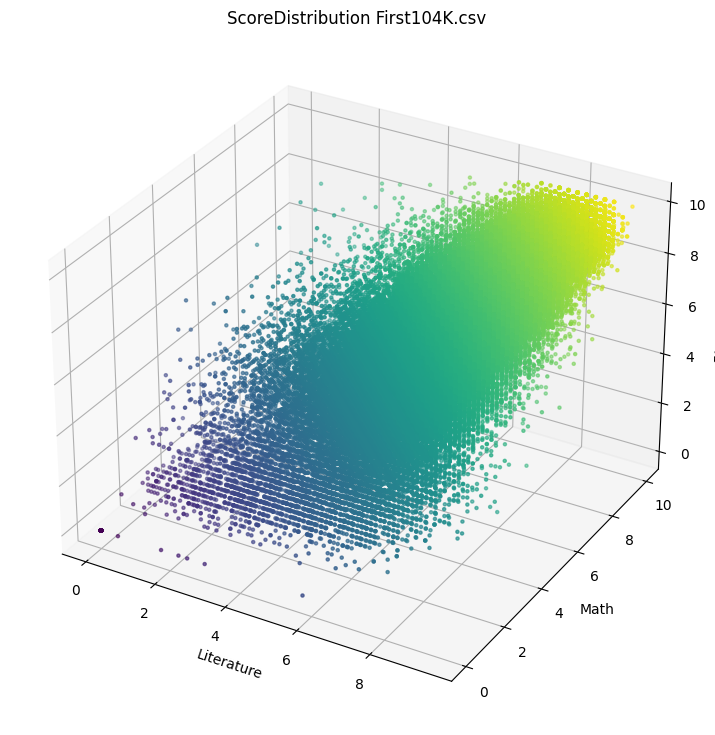

In [59]:
#@title Draw 3D scatterplot for 3 columns
view_dense = False #@param {type:"boolean"}
#@markdown the density view won't work lol
p = d if view_dense else t

fig = plt.figure(figsize=FIG)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=p, marker=marker)
ax.set_title("ScoreDistribution " + fn)
ax.set_xlabel(SX)
ax.set_ylabel(SY)
ax.set_zlabel(SZ)

plt.show()

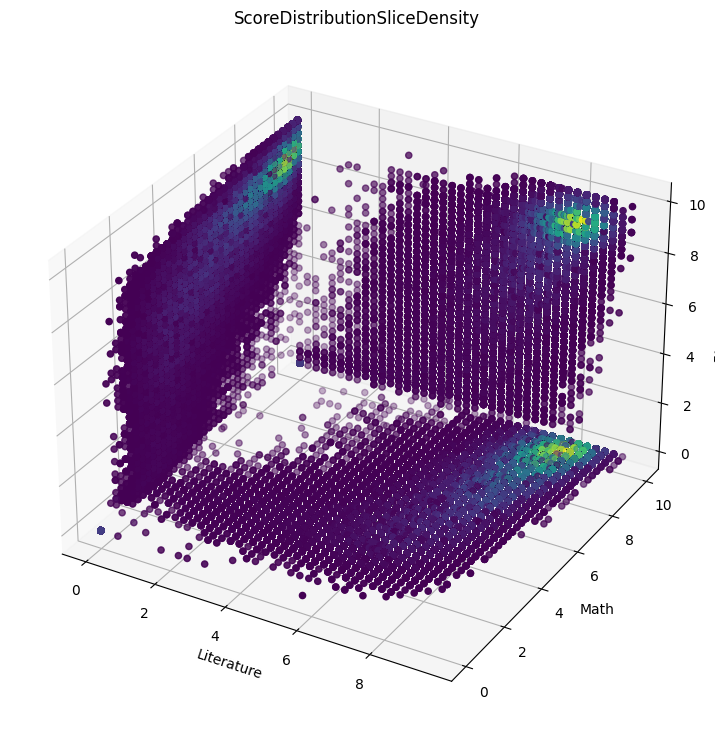

In [61]:
#@title Xray the 3D scatterplot
view_dense = True #@param {type:"boolean"}
p = d if view_dense else t
m = "o"

figxy = plt.figure(figsize=FIG)
ax = figxy.add_subplot(111, projection='3d')

ax.set_title("ScoreDistributionSlice" + "Density" if view_dense else "" + fn)
ax.scatter(x, y, c=p, marker=m)
ax.scatter(x, 10, z, c=p, marker=m)
ax.scatter(0, y, z, c=p, marker=m)
ax.set_xlabel(SX)
ax.set_ylabel(SY)
ax.set_zlabel(SZ)

plt.show()